# Infinite-dimensional family of colliding wave solutions with variable polarization Breton et al
##  Geoff Cope
##  University of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 11, 2022

This metric in particular seems to break both EinsteinPy and Sympy.  See "EhlersKundtRosenMetric.ipynb" for traceback errors.  The idea here is to resplace the sinh and cosh with functions f and h (g reservered for metric), compute the einstein and ricci tensors, then back subsitute in the sinh and cosh for f and h.  It kind of works.  Except when it doesn't which is often.  It is not entirely clear where the problem is, except most traceback errors mention the hyperbolic trig functions.  No idea how to fix this.  The other issue is that the Ricci tensor appears to use only integers but the einstein tensor has expressions like 1.0 so it's not clear if this is a numpy or sympy array.  But wow, numpy and sympy sure do clash

In [58]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,y,du,dv,dx,dy,ds = symbols('u v x y du dv dx dy ds' , positive = True, real = True)

In [4]:
M = Function('M')(u,v)
M

In [5]:
U = Function('U')(u,v)
U

In [6]:
V = Function('V')(u,v)
V

In [7]:
W = Function('W')(u,v)
W

In [8]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [9]:
differentials = Matrix( [du,dv,dx,dy] ) 
differentials

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [10]:
lineElement1 = Eq(ds**2,expand(2*exp(-M)*du*dv - exp(-U)* ( exp(V) * cosh(W) * dx**2 - 2*sinh(W)*dx*dy + exp(-V)*cosh(W)* dy**2)))
lineElement1 

In [11]:
f = Function('f')(u,v)
f

In [12]:
h = Function('h')(u,v)
h

In [13]:
coshSub = Eq(f,cosh(W))
coshSub

In [14]:
sinhSub = Eq(h,sinh(W))
sinhSub

In [15]:
#  Here we are replacing cosh with f and sinh with g
lineElement = lineElement1.rhs.subs(lineElement1.rhs.args[1].args[2],f).subs(lineElement1.rhs.args[2].args[2],f).subs(lineElement1.rhs.args[3].args[4],h)
lineElement

In [16]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -M(u, v)                                                           ⎤
⎢    0      ℯ                       0                            0              ⎥
⎢                                                                               ⎥
⎢ -M(u, v)                                                                      ⎥
⎢ℯ              0                   0                            0              ⎥
⎢                                                                               ⎥
⎢                                -U(u, v)  V(u, v)                -U(u, v)      ⎥
⎢    0          0      -f(u, v)⋅ℯ        ⋅ℯ              h(u, v)⋅ℯ              ⎥
⎢                                                                               ⎥
⎢                                    -U(u, v)                 -U(u, v)  -V(u, v)⎥
⎣    0          0           h(u, v)⋅ℯ               -f(u, v)⋅ℯ        ⋅ℯ        ⎦

In [17]:
import sympy

In [18]:
m = sympy.Array(g)
m

⎡            -M(u, v)                                                           ⎤
⎢    0      ℯ                       0                            0              ⎥
⎢                                                                               ⎥
⎢ -M(u, v)                                                                      ⎥
⎢ℯ              0                   0                            0              ⎥
⎢                                                                               ⎥
⎢                                -U(u, v)  V(u, v)                -U(u, v)      ⎥
⎢    0          0      -f(u, v)⋅ℯ        ⋅ℯ              h(u, v)⋅ℯ              ⎥
⎢                                                                               ⎥
⎢                                    -U(u, v)                 -U(u, v)  -V(u, v)⎥
⎣    0          0           h(u, v)⋅ℯ               -f(u, v)⋅ℯ        ⋅ℯ        ⎦

In [19]:
from einsteinpy.symbolic import *

In [40]:
syms = sympy.symbols("u v x y" , positive = True, real = True)
u,v,x,y = syms

In [41]:
metric = MetricTensor(m,syms)

In [42]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡ ∂                                                                                        
⎢⎢-──(M(u, v))  0                                             0                             
⎢⎢ ∂u                                                                                       
⎢⎢                                                                                          
⎢⎢     0        0                                             0                             
⎢⎢                                                                    

In [43]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                   4       ∂           ∂   
⎢                                                                  f (u, v)⋅──(M(u, v))⋅──(U
⎢                                                                           ∂u          ∂u  
⎢                                                                                           
⎢                                                                  ─────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

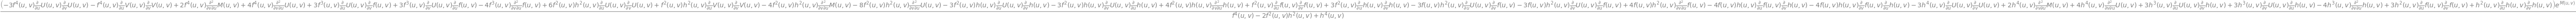

In [44]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [45]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [26]:
# rm1 = RiemannCurvatureTensor.from_christoffels(ch)
# rm1.tensor()

In [27]:
# weyl = WeylTensor.from_metric(metric)
# weyl.tensor()

In [46]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                   4       ∂           ∂   
⎢                                                                  f (u, v)⋅──(M(u, v))⋅──(U
⎢                                                                           ∂u          ∂u  
⎢                                                                                           
⎢                                                                  ─────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [47]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                         2                                 
⎢                                    4       ⎛∂          ⎞                             4    
⎢                                   f (u, v)⋅⎜──(U(u, v))⎟               2            f (u, 
⎢ 4       ∂           ∂                      ⎝∂u         ⎠     4        ∂                   
⎢f (u, v)⋅──(M(u, v))⋅──(U(u, v)) - ─────────────────────── + f (u, v)⋅───(U(u, v)) - ──────
⎢         ∂u          ∂u                       2                         2                  
⎢                                                                      ∂u                   
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

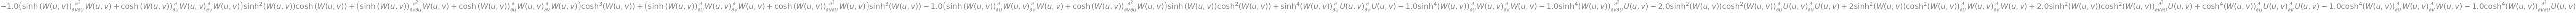

In [56]:
einsteinSubs10 = einsteinSimplified[1,0].subs(coshSub.lhs,coshSub.rhs).subs(sinhSub.lhs,sinhSub.rhs).args[1].doit()
einsteinSubs10

In [57]:
einsteinSubs10.simplify()

NotImplementedError: Improve MV Derivative support in collect